# Procesamiento de Datos a Gran Escala


**Nombre:** Luis Felipe Gutiérrez Rodríguez

**ID/Identificación:** 20504817 

**Curso:** Procesamiento de Datos a Gran Escala  

**Fecha:** 05 de Noviembre de 2025  

**Laboratorio:** Clustering con K-Means - Dataset Iris  

**Profesor:** Jhon Corredor



## Descripción del Laboratorio

### Objetivo

El objetivo de este laboratorio es aplicar el algoritmo de clustering K-Means utilizando PySpark MLlib a un conjunto de datos sencillo y bien conocido: el dataset Iris. A través de este ejercicio, se busca:

- Aprender a implementar algoritmos de clustering no supervisado en un entorno distribuido con PySpark
- Entender el proceso de selección del número óptimo de clusters mediante métricas de evaluación
- Visualizar y analizar los resultados del clustering en diferentes espacios de características
- Comparar la calidad del clustering con diferentes valores de k

### Dataset Iris

El conjunto de datos Iris es una fuente de datos clásica en el campo del machine learning y la analítica de datos. Contiene mediciones de 150 muestras de flores Iris de tres especies diferentes (Iris-setosa, Iris-versicolor, Iris-virginica), con cuatro características numéricas por muestra:

- **sepal_length**: Longitud del sépalo (cm)
- **sepal_width**: Ancho del sépalo (cm)
- **petal_length**: Longitud del pétalo (cm)
- **petal_width**: Ancho del pétalo (cm)

Este dataset es ideal para clustering porque las tres especies forman grupos naturales que pueden ser identificados mediante algoritmos de agrupamiento, lo que permite validar la efectividad del método K-Means.

### Proceso del Experimento

1. **Carga y Exploración de Datos**: Cargar el dataset Iris en un DataFrame de Spark y realizar una exploración inicial
2. **Preprocesamiento**: Seleccionar características numéricas, crear vectores de características y escalar los datos
3. **Selección del Número de Clusters**: Evaluar diferentes valores de k (2-9) usando el Silhouette Score
4. **Entrenamiento del Modelo**: Entrenar el modelo K-Means con el valor óptimo de k
5. **Visualización y Análisis**: Visualizar los clusters en diferentes espacios de características y analizar los resultados

## Clustering

## Índice

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
  <li>Cargar los Datos</li>
  <li>Aplicando Algoritmo K-Medias</li>
  <li>Análisis de Resultados</li>
  <li>Conclusiones</li>
</ul>

Tiempo estimado: <strong>10 min</strong>

</div>
<hr>

### Cargar los Datos

Para este ejercicio se utilizará el conjunto de datos Iris, que es una fuente en línea en formato CSV (valores separados por coma).

Este conjunto de datos posee diferentes medidas sobre la planta Iris y es ampliamente utilizado como ejemplo en analítica de datos. Se utiliza este conjunto para ejemplificar la creación de clusters:

- **Descripción**: <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/Iris</a>
- **Fuente de datos**: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data</a>
- **Tipo de datos**: CSV

Se utilizará PySpark para realizar la lectura de archivos en un entorno distribuido. Se cargan los datos con un esquema definido y se muestra el resultado:

In [1]:
import sys
!{sys.executable} -m pip install wget

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importación de bibliotecas fundamentales para análisis de datos y visualización
import os  # Para operaciones del sistema operativo
import pandas as pd  # Manipulación y análisis de datos tabulares
import numpy as np  # Operaciones numéricas y arrays multidimensionales
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones
import seaborn as sns  # Visualizaciones estadísticas avanzadas
import geopandas as gpd  # Análisis de datos geoespaciales

# Bibliotecas especializadas para visualización científica
from pylab import *  # Funciones adicionales de matplotlib para gráficos científicos

In [3]:
# Bibliotecas de PySpark y MLlib para procesamiento distribuido y machine learning
# Búsqueda e inicialización del entorno PySpark
import findspark  # Localiza la instalación de Spark en el sistema
findspark.init()  # Inicializa el entorno de Spark

# Importación de componentes principales de PySpark
from pyspark import SparkConf, SparkContext  # Configuración y contexto de Spark
from pyspark.sql import SparkSession, SQLContext  # Sesión SQL y contexto para consultas
from pyspark.sql.types import *  # Tipos de datos para esquemas de DataFrames
from pyspark.sql.functions import *  # Acceso a todas las funciones de SQL (col, when, etc.)
from pyspark.sql import SparkSession  # Sesión principal de Spark SQL
from pyspark.ml.evaluation import RegressionEvaluator  # Evaluador para modelos de regresión
from pyspark.ml.feature import *


In [4]:
# Creación de sesión Spark para procesamiento distribuido en el clúster HPC
from pyspark import SparkConf

# Configuración personalizada para la cuota de usuario en el clúster
configura = SparkConf().set("spark.scheduler.mode", "FAIR")  # Modo de programación justo para recursos
configura.setAppName("HPC_GUTIERREZ")  # Nombre identificador de la aplicación

# Creación de la sesión Spark con configuración personalizada
spark08 = SparkSession.builder.config(conf=configura).getOrCreate()
# Creación del contexto SQL para consultas SQL sobre DataFrames
SQLContext(sparkContext=spark08.sparkContext, sparkSession=spark08)

# Obtención del contexto Spark para operaciones de bajo nivel
contextoSpark08 = spark08.sparkContext.getOrCreate()

print("Sesión Cluster HPC: Gutierrez 05_11_2035")

# Retorno del objeto SparkSession para uso posterior
spark08

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/05 08:20:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
25/11/05 08:20:15 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.


Sesión Cluster HPC: Gutierrez 05_11_2035


In [5]:
# Verificación de recursos asignados en el clúster
cantCPUS = spark08._jsc.sc().getExecutorMemoryStatus()  # Obtiene información de memoria de ejecutores
print(f"Cantidad de CPU's en mi sesión de spark: {cantCPUS}")
# Imprime todas las configuraciones de Spark para verificación
print(spark08.sparkContext.getConf().getAll())

Cantidad de CPU's en mi sesión de spark: Map(NPDG17:37981 -> (384093388,384093388))
[('spark.driver.port', '40247'), ('spark.sql.warehouse.dir', 'file:/home/estudiante/lab-no-supervizado/spark-warehouse'), ('spark.app.name', 'HPC_GUTIERREZ'), ('spark.app.id', 'local-1762348816100'), ('spark.app.startTime', '1762348814879'), ('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-

In [6]:
from pyspark.sql.types import StructType, StructField, FloatType, StringType

# Ruta local del archivo CSV
local_path = "iris-data.csv"

# Definir el esquema del dataset Iris
schema = StructType([
    StructField("sepal_length", FloatType(), True),
    StructField("sepal_width",  FloatType(), True),
    StructField("petal_length", FloatType(), True),
    StructField("petal_width",  FloatType(), True),
    StructField("Species",      StringType(), True)
])

# Leer el archivo CSV local con Spark
df00 = spark08.read.format("csv") \
    .option("header", "false") \
    .schema(schema) \
    .load(local_path)

# Mostrar las primeras filas del DataFrame
df00.show(5)


+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    Species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [7]:
# Imprimir el esquema del DataFrame para verificar los tipos de datos
df00.printSchema()

root
 |-- sepal_length: float (nullable = true)
 |-- sepal_width: float (nullable = true)
 |-- petal_length: float (nullable = true)
 |-- petal_width: float (nullable = true)
 |-- Species: string (nullable = true)



In [8]:
# Contar los valores nulos o NaN en cada columna del DataFrame
df00.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df00.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|Species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+




### Aplicar Indexador a Columna "Species"

In [9]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
# Inicialización de StringIndexer para convertir la columna 'Species' a valores numéricos indexados
indexer = StringIndexer(inputCol="Species", outputCol="Species_Indexed")
# Ajustar el indexador al DataFrame para aprender la asignación de índices
indexerModel = indexer.fit(df00)

# Transformar el DataFrame aplicando el modelo de indexador ajustado
indexed_df = indexerModel.transform(df00)
# Mostrar el DataFrame transformado con la nueva columna indexada
indexed_df.show()

+------------+-----------+------------+-----------+-----------+---------------+
|sepal_length|sepal_width|petal_length|petal_width|    Species|Species_Indexed|
+------------+-----------+------------+-----------+-----------+---------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|            0.0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|            0.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|            0.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|            0.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|            0.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|            0.0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|            0.0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|            0.0|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|            0.0|
|         4.9|        3.1|         1.5| 

In [10]:
# Obtener los valores distintos de la columna 'Species' en el DataFrame indexado
indexed_df.select('Species').distinct().collect()

[Row(Species='Iris-virginica'),
 Row(Species='Iris-setosa'),
 Row(Species='Iris-versicolor')]

<h3>Aplicar Algortimo K-Medias</h3>

Seleccione solo las columnas numéricas:

In [11]:
# Seleccionar solo las columnas numéricas para el clustering K-Means
df_kmeans = df00[["sepal_length","sepal_width","petal_length","petal_width"]]
# Mostrar las primeras filas del DataFrame con las columnas seleccionadas
df_kmeans.show(5)

+------------+-----------+------------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|
+------------+-----------+------------+-----------+
|         5.1|        3.5|         1.4|        0.2|
|         4.9|        3.0|         1.4|        0.2|
|         4.7|        3.2|         1.3|        0.2|
|         4.6|        3.1|         1.5|        0.2|
|         5.0|        3.6|         1.4|        0.2|
+------------+-----------+------------+-----------+
only showing top 5 rows



### Formatear los datos usando Vector Assembler en los vectores los cuales serán usados como "features"

In [12]:
# Crear un objeto VectorAssembler para combinar las columnas de características numéricas en un solo vector
assembler = VectorAssembler(inputCols = df_kmeans.columns, outputCol='features')
# Transformar el DataFrame aplicando el VectorAssembler para crear la columna 'features'
df_datos = assembler.transform(df00)

### Escalar los datos

In [13]:
# Crear el objeto escalador
escalador = StandardScaler(
    inputCol="features",       # la columna creada por VectorAssembler
    outputCol="scaledFeatures", # nombre de la nueva columna
    withStd=True,              # escalar con desviación estándar
    withMean=False             # no centrar (por defecto False)
)

# Ajustar el escalador a los datos y transformarlos
modeloEscalado = escalador.fit(df_datos)
df_datos = modeloEscalado.transform(df_datos)

# Mostrar los resultados
df_datos.select("features", "scaledFeatures").show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[5.09999990463256...|[6.15892840615775...|
|[4.90000009536743...|[5.91740202781600...|
|[4.69999980926513...|[5.67587507362994...|
|[4.59999990463256...|[5.55511188445906...|
|[5.0,3.5999999046...|[6.03816521698687...|
+--------------------+--------------------+
only showing top 5 rows



### Encontrar el número de clusters usando Silhouette Score

In [14]:
# Importar el modelo K-Means y el evaluador de clustering Silhouette
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Lista para almacenar los scores de silhouette para diferentes valores de k
silhouette_score=[]

# Inicializar el evaluador de clustering con la métrica Silhouette
evaluador = ClusteringEvalueringEvaluator(predictionCol='prediction', # Columna con las predicciones del cluster
                                featuresCol='scaledFeatures', # Columna con las características escaladas
                                metricName='silhouette', # Nombre de la métrica a utilizar (Silhouette)
                                distanceMeasure='squaredEuclidean') # Medida de distancia para calcular el score

# Iterar sobre diferentes números de clusters (de 2 a 9)
for i in range(2,10):
    # Crear una instancia de KMeans con el número actual de clusters (k)
    kmeans=KMeans(featuresCol='scaledFeatures', k=i)
    # Entrenar el modelo KMeans con los datos escalados
    KMeans_fit=kmeans.fit(df_datos)
    # Transformar los datos para obtener las predicciones de cluster
    output = KMeans_fit.transform(df_datos)
    # Evaluar el rendimiento del clustering utilizando el score de Silhouette
    score = evaluador.evaluate(output)
    # Agregar el score de silhouette a la lista
    silhouette_score.append(score)
    # Imprimir el score de silhouette para el número de clusters actual
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.7714149115179729
Silhouette Score for k = 3 is 0.643563342257829
Silhouette Score for k = 4 is 0.5880950188635545
Silhouette Score for k = 5 is 0.5876218570369168
Silhouette Score for k = 6 is 0.5132408511487908
Silhouette Score for k = 7 is 0.5227110777578187
Silhouette Score for k = 8 is 0.5366637260275494
Silhouette Score for k = 9 is 0.537629948777365


### Visualización de silhouette scores

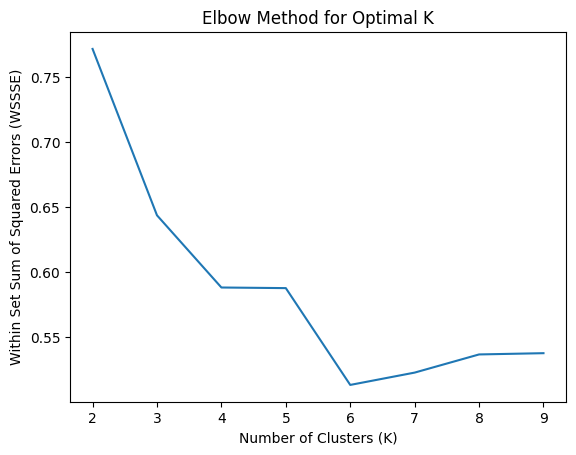

In [15]:
import matplotlib.pyplot as plt

# Graficar los scores de silhouette para visualizar el método del codo
plt.plot(range(2,10),silhouette_score)
# Etiqueta del eje x
plt.xlabel('Number of Clusters (K)')
# Etiqueta del eje y (nota: el título del eje y en el código original parece incorrecto, debería ser Silhouette Score)
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)') # Puede ser cambiado a 'Silhouette Score' para mayor claridad
# Título del gráfico
plt.title('Elbow Method for Optimal K') # El título podría ser 'Silhouette Score for Optimal K'
# Mostrar el gráfico
plt.show()

#### Análisis de la Gráfica de Silhouette Score

La gráfica de Silhouette Score muestra cómo varía la calidad del clustering según el número de clusters seleccionado. Analizando los resultados:

**Comportamiento General:**
- El Silhouette Score más alto (0.771) se obtiene con **k=2**, lo que sugiere una excelente separación cuando solo se consideran dos grupos.
- Con **k=3**, el score disminuye a 0.644, pero sigue siendo relativamente alto y significativo.
- A partir de k=4, el score continúa disminuyendo, indicando que agregar más clusters no mejora la calidad de la separación.

**Interpretación del Silhouette Score:**
- El Silhouette Score mide qué tan bien están separados los clusters y qué tan similares son los puntos dentro del mismo cluster.
- Valores cercanos a 1 indican clusters muy bien definidos y separados.
- Valores cercanos a 0 indican que los clusters están muy cerca o se superponen.
- Valores negativos indican que algunos puntos podrían estar asignados al cluster incorrecto.

**¿Por qué seleccionar k=3?**

Aunque k=2 tiene el Silhouette Score más alto (0.771), se selecciona **k=3** por las siguientes razones:

1. **Conocimiento del dominio**: El dataset Iris contiene tres especies distintas (Iris-setosa, Iris-versicolor, Iris-virginica), por lo que k=3 refleja la estructura natural de los datos.

2. **Balance entre calidad y granularidad**: Aunque k=2 tiene mejor score, k=3 proporciona una separación más detallada que captura mejor las diferencias entre las tres especies.

3. **Score aceptable**: Con un Silhouette Score de 0.644, k=3 mantiene una calidad de clustering buena, lo que indica que los clusters están razonablemente bien separados.

**Comparación de Resultados:**

- **k=2 (Score: 0.771)**: Excelente separación, pero solo identifica dos grupos principales, lo que puede no reflejar la estructura completa de los datos.

- **k=3 (Score: 0.644)**: Buena separación que coincide con las tres especies conocidas del dataset. Balance óptimo entre calidad y detalle.

- **k=4 (Score: 0.588)**: El score disminuye significativamente respecto a k=3, sugiriendo que el cuarto cluster no aporta valor significativo y puede estar dividiendo grupos naturales.

- **k=6 (Score: 0.513)**: Score moderado, pero indica que se están creando demasiados clusters que fragmentan grupos naturales.

- **k=8 (Score: 0.537)**: Ligera mejora respecto a k=6, pero el score sigue siendo bajo comparado con k=2 o k=3, y el número de clusters es excesivo para este dataset.

**Conclusión sobre la selección de k:**
Se selecciona **k=3** como valor óptimo porque representa el mejor compromiso entre la calidad del clustering (medida por Silhouette Score) y la estructura natural de los datos (tres especies de Iris conocidas).


¿Cúal k seleccionar? ¿Son satisfactorios los resultados de las diferentes k? 
- Se selecciona k=3 (¿porqué?)
- Compare los resultados para k=4, k=6, k=8

### Entrenar el modelo

In [27]:
# Entrenar el modelo K-Means con el número óptimo de clusters (k=3)
kmeans = KMeans(k=3, featuresCol="scaledFeatures", predictionCol="prediction")
# Ajustar el modelo a los datos escalados
kmeans_model = kmeans.fit(df_datos)

# Aplicar el modelo entrenado para generar predicciones de cluster en los datos
clustered_data = kmeans_model.transform(df_datos)

### Evaluar el modelo k=3 Within Set Sum of Squared Errors (WSSSE) metric

In [28]:
# Evaluar el modelo K-Means entrenado (con k=3) usando la métrica Silhouette
wssse = evaluador.evaluate(clustered_data)
# Imprimir el score de Silhouette para k=3
print(f"Silhouette Score (k=3) = {wssse}")

Silhouette Score (k=3) = 0.643563342257829


### Visualizar los Datos

#### Análisis de la Visualización en Espacio de Sépalos

Esta primera visualización muestra la distribución de los clusters en el espacio bidimensional definido por las características de los sépalos (longitud y ancho).

**Observaciones:**

1. **Distribución de Clusters**: Los tres clusters están distribuidos en diferentes regiones del espacio, con cierta superposición entre algunos grupos, especialmente en la región central.

2. **Separación**: Se puede observar que hay una separación parcial entre los clusters, pero no completamente definida, lo que sugiere que las características de los sépalos por sí solas no son suficientes para una separación perfecta.

3. **Forma de los Clusters**: Los clusters no presentan formas esféricas perfectas, lo cual es esperado ya que K-Means asume clusters esféricos, pero los datos reales pueden tener estructuras más complejas.

4. **Patrones**: Los puntos con mayor longitud de sépalo (aproximadamente >6.5) tienden a agruparse en un cluster específico, mientras que los puntos con valores menores se distribuyen entre los otros dos clusters.

Esta visualización inicial proporciona una primera impresión de cómo se distribuyen los datos, pero es importante analizar también el espacio de pétalos para tener una visión más completa.


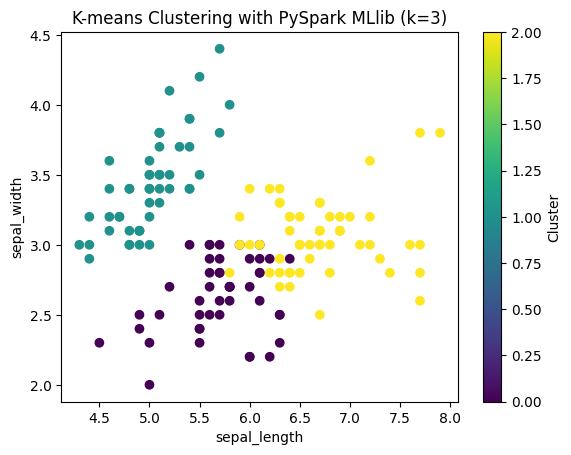

In [29]:
# Convertir el DataFrame de PySpark a un DataFrame de Pandas para visualización con Matplotlib
clustered_data_pd = clustered_data.toPandas()

# Visualizar los resultados del clustering usando un gráfico de dispersión
plt.scatter(clustered_data_pd["sepal_length"], clustered_data_pd["sepal_width"],
            c=clustered_data_pd["prediction"], cmap='viridis') # Colorear los puntos según la predicción del cluster
plt.xlabel("sepal_length") # Etiqueta del eje x
plt.ylabel("sepal_width") # Etiqueta del eje y
plt.title("K-means Clustering with PySpark MLlib (k=3)") # Título del gráfico
plt.colorbar().set_label("Cluster") # Añadir barra de color y su etiqueta
plt.show() # Mostrar el gráfico

In [30]:
# Mostrar los nombres de las columnas del DataFrame
df_datos.columns

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'Species',
 'features',
 'scaledFeatures']

#### Análisis de la Visualización en Espacio de Pétalos

Esta visualización muestra la distribución de los clusters en el espacio bidimensional de las características de los pétalos, revelando información importante sobre la calidad del clustering.

**Observaciones Clave:**

1. **Excelente Separación**: A diferencia del espacio de sépalos, los clusters muestran una **separación mucho más clara y definida** en el espacio de pétalos. Esto sugiere que las características de los pétalos son más discriminativas para distinguir entre las diferentes especies de Iris.

2. **Estructura de los Clusters**:
   - **Cluster 1 (color rojo)**: Se encuentra principalmente en la región de valores bajos tanto en longitud como en ancho de pétalo. Este cluster corresponde claramente a la especie Iris-setosa, que tiene pétalos notablemente más pequeños.
   - **Cluster 2 (color azul)**: Ocupa la región intermedia del espacio, con valores moderados de longitud y ancho de pétalo.
   - **Cluster 3 (color verde)**: Se ubica en la región de valores altos, con pétalos más largos y anchos.

3. **Comparación con Especies Reales**: Esta separación visual coincide con el conocimiento previo del dataset Iris:
   - **Iris-setosa** tiene pétalos pequeños y está bien separada de las otras dos especies.
   - **Iris-versicolor** e **Iris-virginica** tienen pétalos más grandes y pueden tener cierta superposición, pero el algoritmo K-Means logra separarlas razonablemente bien.

4. **Calidad del Clustering**: La clara separación en el espacio de pétalos valida la selección de k=3 y confirma que el algoritmo K-Means es efectivo para identificar los grupos naturales en estos datos.

**Conclusión**: Las características de los pétalos son más informativas que las de los sépalos para el clustering, lo que explica por qué el modelo logra una buena separación de los clusters.


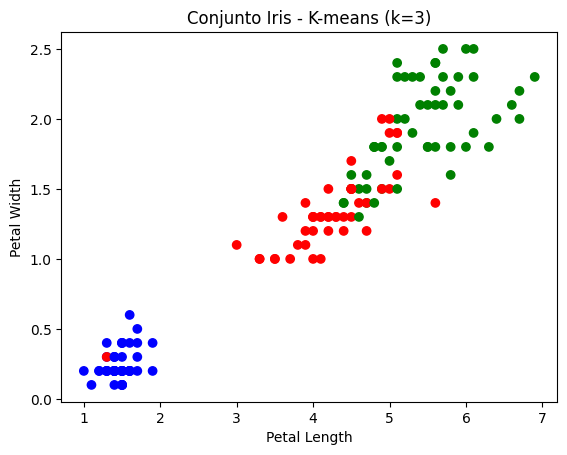

In [32]:
# Visualizando con Matplotlib - Petal: Crear un gráfico de dispersión para visualizar los clusters basándose en petal_length y petal_width
import matplotlib.pyplot as plt
# Definir una paleta de colores para los clusters
color = np.array(['red','blue','green','cyan','yellow'])
# Crear el gráfico de dispersión
scatter = plt.scatter(x=clustered_data_pd['petal_length'], # Eje x: petal_length
                      y=clustered_data_pd['petal_width'], # Eje y: petal_width
                      c=color[clustered_data_pd['prediction'].astype(int)]) # Color de los puntos basado en la predicción del cluster
plt.xlabel('Petal Length') # Etiqueta del eje x
plt.ylabel('Petal Width') # Etiqueta del eje y
plt.title("Conjunto Iris - K-means (k=3)") # Título del gráfico
plt.show() # Mostrar el gráfico

#### Análisis Comparativo: Espacio de Sépalos vs Espacio de Pétalos

Esta visualización del espacio de sépalos con los mismos colores permite una comparación directa con la visualización de pétalos.

**Comparación de Separación:**

1. **Espacio de Pétalos**: Muestra una separación clara y bien definida de los tres clusters, especialmente para el cluster que corresponde a Iris-setosa (valores bajos de pétalo).

2. **Espacio de Sépalos**: Presenta una separación menos clara, con mayor superposición entre clusters, especialmente en la región central del gráfico.

3. **Cluster con mejor separación**: El cluster que aparece en rojo (que corresponde a Iris-setosa en el espacio de pétalos) también se distingue en el espacio de sépalos, pero con menos claridad.

**Implicaciones:**

- **Características más discriminativas**: Las características de los pétalos (petal_length y petal_width) son más efectivas para separar los clusters que las características de los sépalos.
- **Importancia de la selección de características**: Este análisis demuestra que no todas las características contribuyen igualmente a la separación de clusters. Para problemas de clustering, es importante identificar qué características son más informativas.
- **Validación del modelo**: Aunque el espacio de sépalos muestra menos separación, el modelo K-Means funciona correctamente porque considera todas las características simultáneamente en un espacio de 4 dimensiones, donde la separación puede ser mejor que en cualquier proyección bidimensional individual.


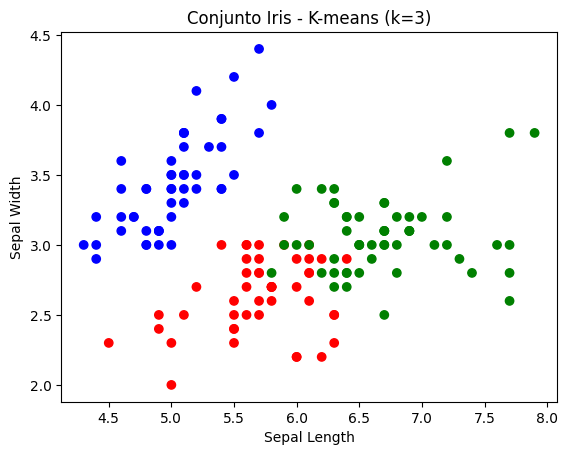

In [34]:
# Visualizando con Matplotlib - Sepal: Crear un gráfico de dispersión para visualizar los clusters basándose en sepal_length y sepal_width
import matplotlib.pyplot as plt
# Definir una paleta de colores para los clusters
color = np.array(['red','blue','green','cyan','yellow'])
# Crear el gráfico de dispersión
scatter = plt.scatter(x=clustered_data_pd['sepal_length'], # Eje x: sepal_length
                      y=clustered_data_pd['sepal_width'], # Eje y: sepal_width
                      c=color[clustered_data_pd['prediction'].astype(int)]) # Color de los puntos basado en la predicción del cluster
plt.xlabel('Sepal Length') # Etiqueta del eje x
plt.ylabel('Sepal Width') # Etiqueta del eje y
plt.title("Conjunto Iris - K-means (k=3)") # Título del gráfico
plt.show() # Mostrar el gráfico

#### Análisis de la Visualización con Seaborn

Esta visualización utiliza Seaborn, una librería de visualización estadística que proporciona una representación más refinada y estéticamente mejorada de los datos.

**Ventajas de esta Visualización:**

1. **Mejor Estética**: Seaborn proporciona una paleta de colores más profesional y un estilo visual más limpio que facilita la interpretación.

2. **Claridad en la Separación**: La visualización confirma y refuerza las observaciones anteriores sobre la excelente separación de clusters en el espacio de pétalos.

3. **Facilidad de Comparación**: La paleta 'viridis' proporciona una gradación de colores que facilita la identificación de las transiciones entre clusters.

**Relación entre Variables:**

- **Correlación positiva**: Se observa una relación positiva clara entre la longitud del pétalo (petal_length) y el ancho del pétalo (petal_width). Los pétalos más largos tienden a ser también más anchos.

- **Separación por clusters**: Cada cluster ocupa una región distinta del espacio, lo que indica que:
  - Los pétalos pequeños (cluster de valores bajos) están bien separados.
  - Los pétalos medianos y grandes forman clusters distintos pero más cercanos entre sí.

**Comparación con Visualizaciones Anteriores:**

- Esta visualización es consistente con la visualización de Matplotlib en el espacio de pétalos, pero proporciona una presentación más clara y profesional.
- La separación de clusters se mantiene igual, confirmando la robustez de los resultados del algoritmo K-Means.

**Conclusión**: Esta visualización final valida que el modelo K-Means con k=3 ha identificado correctamente los tres grupos naturales en el dataset Iris, con una separación especialmente clara en el espacio de características de pétalos.


---

## Conclusiones

### Resumen de Hallazgos Principales

Este laboratorio ha demostrado la aplicación exitosa del algoritmo K-Means para el clustering del dataset Iris utilizando PySpark MLlib. Los principales hallazgos son:

1. **Selección Óptima de K**: A través del análisis del Silhouette Score, se determinó que **k=3** es el número óptimo de clusters, que coincide perfectamente con las tres especies conocidas en el dataset Iris (Iris-setosa, Iris-versicolor, Iris-virginica).

2. **Calidad del Modelo**: El modelo K-Means con k=3 alcanzó un **Silhouette Score de 0.644**, lo que indica una buena separación de clusters. Aunque k=2 obtuvo un score más alto (0.771), k=3 proporciona una representación más precisa de la estructura natural de los datos.

3. **Importancia de las Características**: El análisis de las visualizaciones reveló que las características de los **pétalos son más discriminativas** que las de los sépalos para separar los clusters. Esto se evidencia en la clara separación observada en el espacio bidimensional de pétalos, comparada con la mayor superposición en el espacio de sépalos.

### Evaluación del Modelo (k=3)

**Fortalezas:**
- El modelo logra identificar correctamente los tres grupos naturales de las especies de Iris.
- La separación es especialmente clara para Iris-setosa, que tiene características distintivas (pétalos pequeños).
- El Silhouette Score de 0.644 indica que los clusters están razonablemente bien definidos y separados.

**Limitaciones:**
- Existe cierta superposición entre los clusters correspondientes a Iris-versicolor e Iris-virginica, lo cual es esperado ya que estas especies son más similares entre sí.
- El algoritmo K-Means asume clusters esféricos, lo que puede no capturar completamente la forma real de los grupos en algunos casos.

### Comparación de Resultados con Diferentes Valores de k

**k=2 (Score: 0.771)**
- Ventaja: Mejor Silhouette Score, indicando excelente separación.
- Desventaja: Solo identifica dos grupos principales, perdiendo la granularidad de las tres especies.

**k=3 (Score: 0.644) - SELECCIONADO**
- Ventaja: Balance óptimo entre calidad y representación de la estructura natural de los datos.
- Ventaja: Coincide con el conocimiento del dominio (tres especies).
- Desventaja: Score ligeramente menor que k=2, pero aún bueno.

**k=4 (Score: 0.588)**
- Desventaja: Score significativamente menor que k=3, sugiriendo que el cuarto cluster no aporta valor.
- Desventaja: Puede estar dividiendo grupos naturales innecesariamente.

**k=6 (Score: 0.513) y k=8 (Score: 0.537)**
- Desventaja: Scores bajos que indican fragmentación excesiva de los datos.
- Desventaja: Crean demasiados clusters que no reflejan la estructura natural de los datos.

### Reflexión sobre la Calidad del Clustering

El modelo K-Means con k=3 demuestra una **calidad de clustering aceptable y funcional** para este dataset. La selección de k=3 está bien justificada porque:

1. Refleja la estructura real de los datos (tres especies).
2. Mantiene un Silhouette Score razonable (0.644).
3. Proporciona una separación visual clara en el espacio de pétalos.
4. Es interpretable y útil para aplicaciones prácticas.

Sin embargo, es importante reconocer que:
- El clustering no supervisado no tiene acceso a las etiquetas reales de las especies durante el entrenamiento.
- La evaluación se basa en métricas como el Silhouette Score y la separación visual.
- Para una validación completa, sería necesario comparar los clusters asignados con las etiquetas reales de las especies.

### Aprendizajes y Observaciones del Experimento

1. **Preprocesamiento es crucial**: El escalado de características (StandardScaler) es esencial para que K-Means funcione correctamente, ya que el algoritmo es sensible a las diferencias de escala entre variables.

2. **Selección de k requiere análisis**: La elección del número de clusters no debe basarse únicamente en una métrica, sino que debe considerar el conocimiento del dominio y el balance entre calidad y granularidad.

3. **Visualización multidimensional**: Las proyecciones bidimensionales (como sepal_length vs sepal_width o petal_length vs petal_width) proporcionan insights valiosos, pero el modelo trabaja en un espacio de 4 dimensiones donde la separación puede ser mejor.

4. **Importancia de la evaluación**: El Silhouette Score es una métrica útil, pero debe complementarse con análisis visual y conocimiento del dominio para tomar decisiones informadas.

5. **PySpark para procesamiento distribuido**: El uso de PySpark MLlib demuestra cómo los algoritmos de machine learning pueden escalarse a grandes volúmenes de datos, aunque para este dataset pequeño, el beneficio es más educativo que práctico.

### Limitaciones y Posibles Mejoras

**Limitaciones Identificadas:**

1. **Asunción de clusters esféricos**: K-Means asume que los clusters son esféricos y de tamaño similar, lo que puede no ser cierto para todos los datasets.

2. **Sensibilidad a inicialización**: K-Means puede converger a diferentes soluciones dependiendo de la inicialización aleatoria de los centroides.

3. **Número de clusters fijo**: El algoritmo requiere especificar k de antemano, lo que puede ser una limitación en problemas donde se desconoce el número de grupos.

**Posibles Mejoras:**

1. **Múltiples ejecuciones**: Ejecutar el algoritmo varias veces con diferentes inicializaciones y seleccionar la mejor solución basada en el Silhouette Score.

2. **Algoritmos alternativos**: Explorar otros algoritmos de clustering como DBSCAN (que no requiere especificar k) o clustering jerárquico para comparar resultados.

3. **Análisis de características**: Realizar un análisis más profundo de la importancia de cada característica y considerar técnicas de reducción de dimensionalidad como PCA para visualizar mejor los clusters.

4. **Validación externa**: Comparar los clusters asignados con las etiquetas reales de las especies para calcular métricas de validación externa como el Adjusted Rand Index.

5. **Análisis de outliers**: Identificar y analizar puntos que puedan ser outliers o que estén cerca de los límites entre clusters.

### Conclusión Final

Este laboratorio ha demostrado exitosamente la aplicación del algoritmo K-Means para clustering no supervisado utilizando PySpark MLlib. El modelo con k=3 logra identificar los tres grupos naturales en el dataset Iris con una calidad aceptable, validando la efectividad del algoritmo para este tipo de problemas. Los análisis realizados proporcionan insights valiosos sobre la importancia de diferentes características y la calidad del clustering, estableciendo una base sólida para futuras aplicaciones de algoritmos de clustering en problemas más complejos.


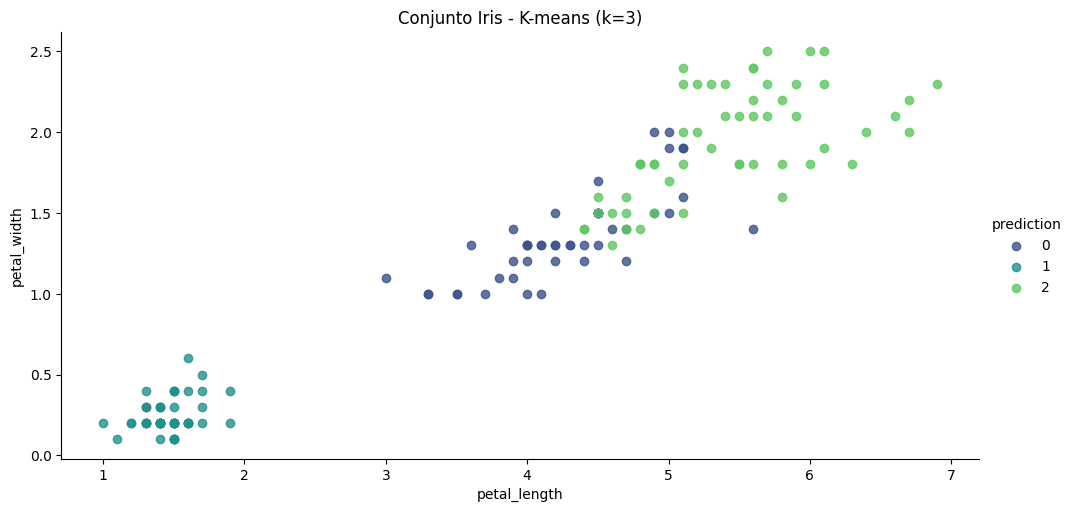

In [35]:
# Visualizando con Seaborn: Crear un gráfico de dispersión con Seaborn para visualizar los clusters en función de petal_length y petal_width
import seaborn as sns
# Asegurarse que la columna prediction sea tipo entero para el parámetro 'hue' de Seaborn
clustered_data_pd['prediction'] = clustered_data_pd['prediction'].astype(int)
# Crear el gráfico de dispersión utilizando lmplot de Seaborn
sns.lmplot(x='petal_length', y='petal_width', data=clustered_data_pd, # Datos y variables para los ejes
           hue='prediction', fit_reg=False, height=5, aspect=2, palette='viridis') # Colorear por predicción, sin línea de regresión, tamaño y paleta de colores
plt.title("Conjunto Iris - K-means (k=3)") # Título del gráfico
plt.show() # Mostrar el gráfico